In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from seaborn import countplot
from imblearn.over_sampling import SMOTE

In [27]:
train = pd.read_csv('../SUDHEER/train.csv')
test = pd.read_csv("../SUDHEER/test.csv")
train.head()


,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [28]:
train, val = train_test_split(train, test_size=0.1, random_state=2018)

# Class Imbalance

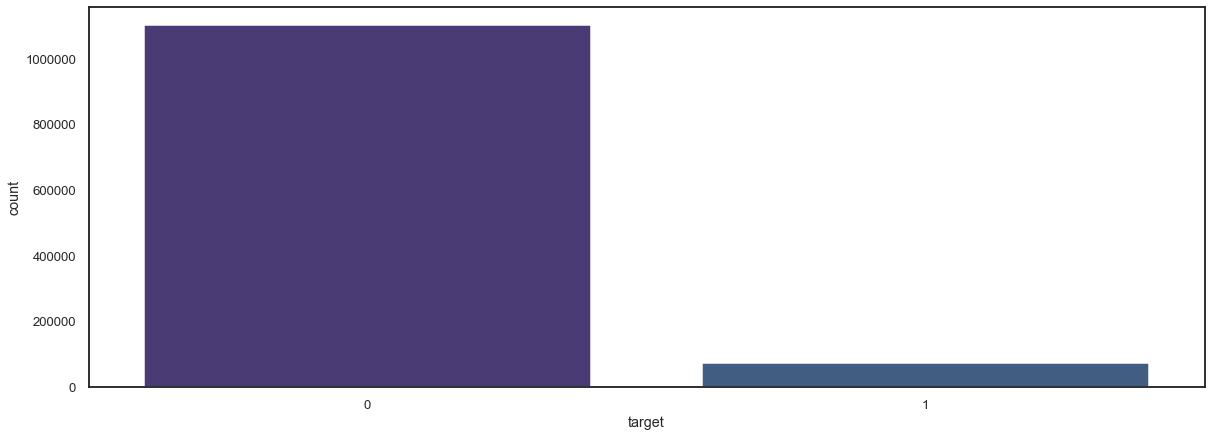

In [29]:
sns_plot=countplot(x="target", data=train)

In [30]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Extract target values

In [31]:
y_train = train['target'].values
y_val = val['target'].values

# Tokenize the train and val data

In [32]:
tokenize = Tokenizer(num_words = 50000)
tokenize.fit_on_texts(train['question_text'])
x_train = tokenize.texts_to_sequences(train['question_text'])
x_val = tokenize.texts_to_sequences(val['question_text'])

# Padding for equal length

In [33]:
x_train = pad_sequences(x_train, maxlen=50, padding='post', truncating='post')
x_val = pad_sequences(x_val, maxlen=50, padding='post', truncating='post')

# Performing SMOTE

In [10]:
smt = SMOTE(sampling_strategy=1)
x_smote, y_smote = smt.fit_sample(x_train, y_train)

Balanced Class after SMOTE


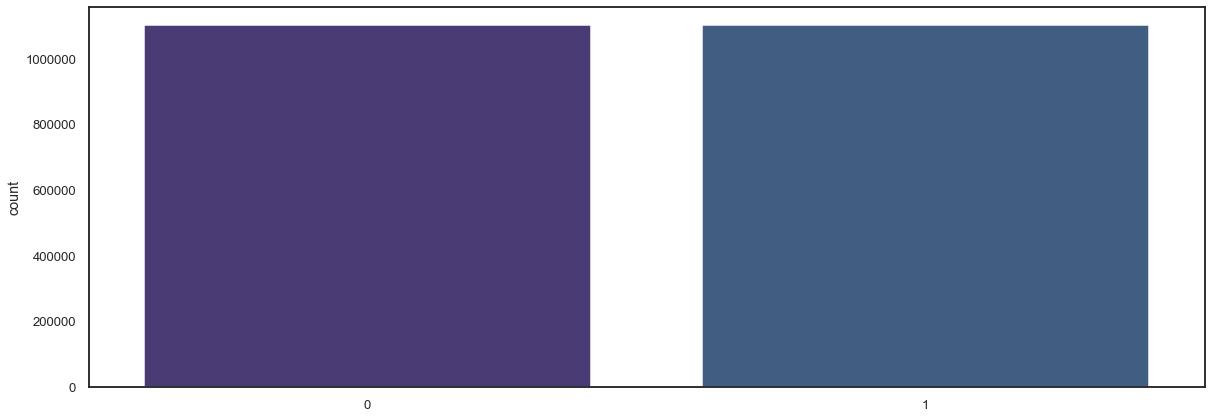

In [11]:
countplot(y_smote)
print("Balanced Class after SMOTE")